## NRSur7dq4

In [1]:
import CactusTool

name = 'BBH000Lev4'
sim = CactusTool.load(name, '/Volumes/simulations/BBH_Catalog')
mp = sim.ThornOutput('multipole')
bbh = sim.ThornOutput('TwoPunctures')
qlm = sim.ThornOutput('quasilocalmeasures')
loc = sim.ThornOutput('puncturetracker')
strain = mp.Strain(bbh.ADMMass, bbh.CutoffFrequency, (2,2), -1)

In [2]:
import gwsurrogate
import numpy as np

sur = gwsurrogate.LoadSurrogate('NRSur7dq4')
m1 = bbh.m1
m2 = bbh.m2
q = bbh.mass_ratio
chiA = bbh.chi1
chiB = bbh.chi2
dt = 0.1        # timestep size, Units of M
f_low = bbh.Omega_orb / np.pi   # initial frequency, f_low=0 returns the full surrogate
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low) 
t_p, h_p, dyn_p = sur(q, chiA, chiB, dt=dt, f_low=f_low, precessing_opts={'return_dynamics': True})

import surfinBH

#  Dimensionless orbital frequency at reference epoch (in units of rad/M)
fit_name = 'NRSur7dq4Remnant'
fit = surfinBH.LoadFits(fit_name)
# All of these together
omega0 = bbh.Omega_orb
mf, chif, vf, mf_err, chif_err, vf_err = fit.all(q, chiA, chiB, omega0=omega0)
print("mf:", mf, "mf_err:", mf_err)
print("chif:", chif, "chif_err:", chif_err)
print("vf:", vf, "vf_err:", vf_err)

/usr/local/lib/python3.8/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/usr/local/lib/python3.8/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


/usr/local/lib/python3.8/site-packages/gwsurrogate/new/precessing_surrogate.py:245: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.t = h5file['t_ds'].value
/usr/local/lib/python3.8/site-packages/gwsurrogate/new/precessing_surrogate.py:272: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  'coefs': group['%s_coefs'%(key)].value,
/usr/local/lib/python3.8/site-packages/gwsurrogate/new/precessing_surrogate.py:273: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  'bfOrders': group['%s_bfOrders'%(key)].value
/usr/local/lib/python3.8/site-packages/gwsurrogate/new/precessing_surrogate.py:282: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  'coefs': group['%s_%d_coefs'%(key, i)].value,
/usr/local/lib/python3.8/site-packages/gwsurrogate/new/precessing_surrogate.py:283: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] 

Loaded NRSur7dq4 model
Loaded NRSur7dq4Remnant fit.
Loaded NRSur7dq4 model
mf: 0.950078643419529 mf_err: 0.00011433166503401867
chif: [-8.10206933e-05 -1.07579216e-04  6.82261461e-01] chif_err: [0.00059609 0.0005957  0.00042786]
vf: [ 9.88419307e-05 -7.49044795e-06 -6.03883640e-03] vf_err: [3.36787220e-05 2.60254750e-05 8.20174946e-05]


## Gravitational Wave

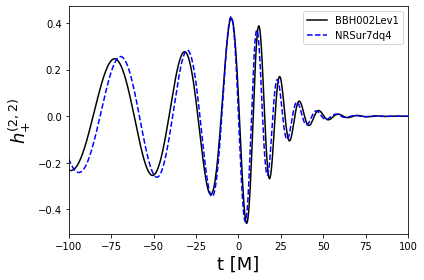

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(strain.t-loc.tmerger()+21,strain.y.real,'k', label='BBH002Lev1')
plt.plot(t, h[(2,2)].real, 'b--', label='NRSur7dq4')
plt.ylabel('$h_{+}^{(2,2)}$', fontsize=18)
plt.xlabel('t [M]', fontsize=18)
plt.xlim(-100,100)
plt.legend()
plt.tight_layout()
plt.savefig('/Users/liuyu/Downloads/GW_BBH002.png')

## Mass

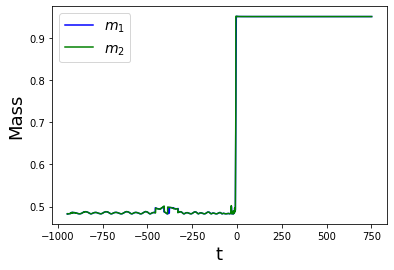

In [4]:
import matplotlib.pyplot as plt

plt.plot(qlm.dsets['t']-loc.tmerger(), qlm.dsets['m1'], 'b', label='$m_{1}$')
# plt.axhline(bbh.m1, c='b', linestyle='--')
plt.plot(qlm.dsets['t']-loc.tmerger(), qlm.dsets['m2'], 'g', label='$m_{2}$')
# plt.axhline(bbh.m2, c='g', linestyle='--')
# plt.axhline(mf, c='k', linestyle='--')
plt.ylabel('Mass', fontsize=18)
plt.xlabel('t', fontsize=18)
plt.legend(fontsize=14)
# plt.savefig('/Users/liuyu/Desktop/ZettelKasten/Report/mass_BBH002.png')

## Spin

In [5]:
plt.figure(1, figsize=(10,6))

plt.plot(qlm.dsets['t']-loc.tmerger, qlm.dsets['spin1x']/bbh.m1**2, 'b', label='$\chi_{1x}$ BBH002Lev1')
plt.plot(t_p, dyn_p['chiA'][:,0], 'b--', label='$\chi_{1x}$ NRSur7dq4')

plt.plot(qlm.dsets['t']-loc.tmerger, qlm.dsets['spin2x']/bbh.m2**2, 'g', label='$\chi_{2x}$ BBH002Lev1')
plt.plot(t_p, dyn_p['chiB'][:,0], 'g--', label='$\chi_{2x}$ NRSur7dq4')

plt.axhline(chif[0], c='k', linestyle='--', label='NRSur7dq4Remnant')

plt.ylabel('$\chi_x$', fontsize=18)
plt.xlabel('t', fontsize=18)
# plt.title('Spinx')
plt.legend(fontsize=14)

plt.figure(2, figsize=(10,6))

plt.plot(qlm.dsets['t']-loc.tmerger, qlm.dsets['spin1y']/qlm.dsets['m1']**2, 'b', label='$\chi_{1y}$ BBH002Lev1')
plt.plot(t_p, dyn_p['chiA'][:,1], 'b--', label='$\chi_{1y}$ NRSur7dq4')

plt.plot(qlm.dsets['t']-loc.tmerger, qlm.dsets['spin2y']/qlm.dsets['m2']**2, 'g', label='$\chi_{2y}$ BBH002Lev1')
plt.plot(t_p, dyn_p['chiB'][:,1], 'g--', label='$\chi_{2y}$ NRSur7dq4')

plt.axhline(chif[1], c='k', linestyle='--', label='NRSur7dq4Remnant')

plt.ylabel('$\chi_y$', fontsize=18)
plt.xlabel('t', fontsize=18)
# plt.title('Spiny')
plt.legend(fontsize=14)

plt.figure(3, figsize=(10,6))

plt.plot(qlm.dsets['t']-loc.tmerger, qlm.dsets['spin1z']/qlm.dsets['m1']**2, 'b', label='$\chi_{1z}$ BBH002Lev1')
plt.plot(t_p, dyn_p['chiA'][:,2], 'b--', label='$\chi_{1z}$ NRSur7dq4')

plt.plot(qlm.dsets['t']-loc.tmerger, qlm.dsets['spin2z']/qlm.dsets['m2']**2, 'g', label='$\chi_{2z}$ BBH002Lev1')
plt.plot(t_p, dyn_p['chiB'][:,2], 'g--', label='$\chi_{2z}$ NRSur7dq4')

plt.axhline(chif[2], c='k', linestyle='--', label='NRSur7dq4Remnant')

plt.ylabel('$\chi_z$', fontsize=18)
plt.xlabel('t', fontsize=18)
# plt.title('Spinz')
plt.legend(fontsize=14)
print(loc.tmerger)
plt.savefig('/Users/liuyu/Downloads/spinz_BBH002.png')


TypeError: unsupported operand type(s) for -: 'float' and 'method'

<Figure size 720x432 with 0 Axes>

In [ ]:
plt.figure(1)

# plt.plot(qlm.dsets['t']-925, qlm.dsets['px'], 'b', label='$\p_{x}$')
plt.axhline(vf[0], c='k', linestyle='--')

plt.figure(2)

# plt.plot(qlm.dsets['t']-925, qlm.dsets['py'], 'b', label='$\p_{y}$')
plt.axhline(vf[1], c='k', linestyle='--')

plt.figure(3)

# plt.plot(qlm.dsets['t']-925, qlm.dsets['pz'], 'b', label='$\p_{z}$')
plt.axhline(vf[2], c='k', linestyle='--')

In [ ]:
import matplotlib.pyplot as plt

tNR = strain[0]
hp = strain[1].real
hc = strain[1].imag
hp_dot = np.gradient(hp, tNR)
hc_dot = np.gradient(hc, tNR)
Omega = (hp_dot*hc - hp*hc_dot) / (2 * (hp**2 + hc**2))
plt.plot(tNR-loc.tmerger+21, Omega, label='BBH002Lev1')

Omega = np.gradient(dyn_p['orbphase'][:,], t_p)
plt.plot(t, Omega, '--', label='NRSur7dq4')
plt.ylabel('$M\omega$', fontsize=18)
plt.xlabel('t', fontsize=18)
# plt.title('$M\omega$')
plt.legend()

# plt.xlim(-1000,-700)
plt.ylim(0,0.3)
plt.savefig('/Users/liuyu/Downloads/omega_BBH002.png')
# plt.savefig('/Users/liuyu/Desktop/ZettelKasten/Report/omega_BBH002.png')